<a href="https://colab.research.google.com/github/milaamir/ML/blob/master/HW6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

chromosomes : [[  2  78  17 102]
 [ 37 109  46  95]
 [ 99  81  37  45]
 [ 78  12  48  27]
 [ 90  99  78  40]
 [ 62  13 104  64]
 [ 92  96  43 111]
 [ 29  37  23  49]
 [ 12  46 101  49]
 [ 33 116  32  85]
 [ 59  28  19  83]
 [ 42  51  51  91]]
Fitness object : [492 648 427 229 557 531 732 243 478 576 379 536]
Fitness : [0.0020284  0.00154083 0.00233645 0.00434783 0.00179211 0.0018797
 0.00136426 0.00409836 0.00208768 0.0017331  0.00263158 0.0018622 ]
Total : 0.02770249664529252
Probability : [0.07322075 0.05562069 0.08434072 0.15694708 0.06469145 0.06785306
 0.0492467  0.14794192 0.07536081 0.06256123 0.09499429 0.06722128]
Cumulative Sum : [0.07322075 0.12884144 0.21318217 0.37012925 0.4348207  0.50267376
 0.55192046 0.69986239 0.7752232  0.83778443 0.93277872 1.        ]
Random Numbers : [0.23448642 0.38656827 0.82084662 0.80878759 0.0848596  0.39593421
 0.13721631 0.41901439 0.15020538 0.57861768 0.00097711 0.15712486]
Chromosomes after updation : [[ 78.  12.  48.  27.]
 [ 90.  99.  

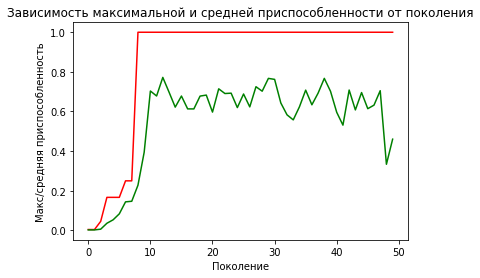

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""
f(x) = a +2b + 3c +4d -30
"""
# Initializing n = 6
n = 12
# Initialization of chromosomes
# chromosome
chromosome = np.random.randint(0,125 ,(n,4))
print("chromosomes :",chromosome)
epoch = 0
maxFitnessValues = []
meanFitnessValues = []

while epoch <  200 :
    objective = abs(125 - chromosome[:,0] - 2*chromosome[:,1] -3*chromosome[:,2] -
                    4*chromosome[:,3] )
    print("Fitness object :", objective)
    
    # Selection of fittest chromosome
    fitness =  1/(1 + objective)
    print("Fitness :",fitness)
    
    maxFitness = max(fitness)
    meanFitness = sum(fitness) / len(chromosome)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)

    # Calculating the total of fitness function
    total = fitness.sum()
    print("Total :",total)
    
    # Calculating Probablility for each chromosome
    prob = fitness/total
    print("Probability :",prob)
    
    # Selection using Roulette Wheel And Calculating Cumulative Probability
    cum_sum = np.cumsum(prob)
    print("Cumulative Sum :", cum_sum)
    
    # Generating Random Numbers in the range 0-1
    Ran_nums = np.random.random((chromosome.shape[0]))
    print("Random Numbers :",Ran_nums)
    
    # Making a new matrix of chromosome for calculation purpose
    chromosome_2 = np.zeros((chromosome.shape[0],4))
    
    for i in range(Ran_nums.shape[0]):
        for j in range(chromosome.shape[0]):
            if Ran_nums[i]  < cum_sum[j]:
                chromosome_2[i,:] = chromosome[j,:]
                break
            
    chromosome = chromosome_2
    print("Chromosomes after updation :",chromosome)
        
    # crossover
    R = [np.random.random() for i in range(n)]
    print("Random Values :",R)
    
    # Crossover Rate
    pc = 0.25
    flag = Ran_nums < pc
    print("Flagged Values :",flag)
    
    # Determining the cross chromosomes
    cross_chromosome = chromosome[[(i == True) for i in flag]]
    print("Cross chromosome :",cross_chromosome)
    len_cross_chrom = len(cross_chromosome)
    
    # Calculating cross values
    cross_values = np.random.randint(1,3,len_cross_chrom)
    print("Cross Values :",cross_values)
    
    cpy_chromosome = np.zeros(cross_chromosome.shape)
    
    # Performing Cross-Over
    
    # Copying the chromosome values for calculations
    for i in range(cross_chromosome.shape[0]):
        cpy_chromosome[i , :] = cross_chromosome[i , :]
        
    if len_cross_chrom == 1:
        cross_chromosome = cross_chromosome
    else :
        for i in range(len_cross_chrom):
            c_val = cross_values[i]
            if i == len_cross_chrom - 1 :
                cross_chromosome[i , c_val:] = cpy_chromosome[0 , c_val:]
            else :
                cross_chromosome[i , c_val:] = cpy_chromosome[i+1 , c_val:]
        
    print("Crossovered Chromosome :",cross_chromosome)
    
    index_chromosome = 0
    index_newchromosome = 0
    for i in flag :
        if i == True :
            chromosome[index_chromosome, :] = cross_chromosome[index_newchromosome, :]
            index_newchromosome = index_newchromosome + 1
        index_chromosome = index_chromosome + 1 
    
    print("New Chromosomes:", chromosome)
    
    # Calculating the total no. of generations
    a ,b = chromosome.shape[0] ,chromosome.shape[1]
    total_gen = a*b
    print("Total Generations :",total_gen)
    
    #mutation rate = pm
    pm = 0.1
    no_of_mutations = int(np.round(pm * total_gen))
    print("No. of Mutations :" ,no_of_mutations)
    
    # Calculating the Generation number
    gen_num = np.random.randint(0,total_gen - 1, no_of_mutations)
    print(" Generated Random Numbers : " , gen_num)
    
    # Generating a random number which can replace the selected chromosome to be mutated
    Replacing_num = np.random.randint(0,30, no_of_mutations)
    print(" Numbers to be replaced : " , Replacing_num)
    
    for i in range(no_of_mutations):
        a = gen_num[i]
        row = a//4
        col = a%4
        chromosome[row , col] = Replacing_num[i]
    
    print(" Chromosomes After Mutation : " , chromosome)
  
    epoch = epoch + 1
  
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()